In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#载入数据库
order = pd.read_csv(r"C:\Users\84011\Desktop\fujian.csv",encoding = 'gbk')##读取附件
print('附件1长度为：', len(order))

附件1长度为： 70680


In [2]:
order1= order.copy() 
jiqi1=order.loc[order['设备ID']=='E43A6E078A07631', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现']]
jiqi2=order.loc[order['设备ID']=='E43A6E078A04134', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现']]
jiqi3=order.loc[order['设备ID']=='E43A6E078A04172', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现']]
jiqi4=order.loc[order['设备ID']=='E43A6E078A04228', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现']]
jiqi5=order.loc[order['设备ID']=='E43A6E078A06874', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现']]#分别提取五台售货机的数据

In [7]:
order=order[ ~ order['支付时间'].str.contains('PM')]
order['支付时间'] = pd.to_datetime(order['支付时间'])
periodIndex = pd.PeriodIndex(order['支付时间'],freq = 'M')
order['paytime']=periodIndex
print(order)#对D号售货机的错误时间数据进行处理，并将日期转换为Datetime类型数据，并只截取月份信息。

                                  订单号             设备ID  应付金额  实际金额  \
0       DD201708167493663618499909784  E43A6E078A07631   4.5   4.5   
1       DD201708167493663555814061164  E43A6E078A04172   3.0   3.0   
2       DD201708167493578526890939886  E43A6E078A06874   5.5   5.5   
3       DD201708167493683507186615837  E43A6E078A04228   5.0   5.0   
4       DD201708167493759548618252006  E43A6E078A04134   3.0   3.0   
5       DD2017081016294251D0FA5D314F1  E43A6E078A04134   4.5   4.5   
6       DD201708167493663534589050871  E43A6E078A04228   7.0   7.0   
7       DD201708167493663526093267894  E43A6E078A04228   8.0   8.0   
8       DD20170526144916178D2B0429C26  E43A6E078A04134   3.0   3.0   
9       DD20170810162914447BA58EF3127  E43A6E078A04228   2.0   2.0   
10     DD2017081674930611792937303584  E43A6E078A07631   5.0   5.0   
11     DD2017081674930612078044876854  E43A6E078A04228   3.0   3.0   
12      DD2017083114403518C7B2A1F9252  E43A6E078A04228   3.0   3.0   
13      DD2017081674

In [13]:
zhutu=order.loc[order['paytime']=='2017-06', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现']]#提取对应月份信息数据

In [102]:
orderGroup=zhutu.groupby(by='商品')#通过groupby函数进行分组聚合，下面操作类似

In [103]:
s1=orderGroup['实际金额'].agg(np.size)#使用agg函数对分组聚合的数据进行处理，计算售货机销量，下面操作类似

In [104]:
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
m1=s1.sort_values(ascending=False)#对销量进行排序

In [105]:
m2=m1.head()#取出销量前五的数据
m2.to_csv('C:/Users/84011/Desktop/m2.csv')#输出文件，下面操作类似

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [106]:
m3 = pd.read_csv(r"C:\Users\84011\Desktop\m3.csv",encoding = 'gbk')#读取处理之后的文件，下面操作类似

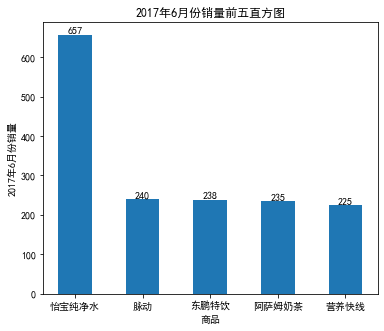

In [107]:
name = m3['商品']## 提取其中的商品数组，视为数据的标签
values =m3['数量']## 提取其中的数量数组，数据的存在位置
label = ['怡宝纯净水','脉动','东鹏特饮','阿萨姆奶茶','营养快线']## 刻度标签
plt.figure(figsize=(6,5))## 设置画布
my_height = values
plt.bar(range(5), my_height, width = 0.5)## 绘制散点图
plt.xlabel('商品')## 添加横轴标签
plt.ylabel('2017年6月份销量')## 添加y轴名称
plt.xticks(range(5), label)
plt.title('2017年6月份销量前五直方图')## 添加图表标题

for i in range(len(my_height)):
    plt.text(i, my_height[i], my_height[i], va='bottom', ha='center')#添加数字标识
    
plt.savefig('C:/Users/84011/Desktop/2017年6月份销量前五直方图.png')
plt.show()

In [74]:
jiqi1=order.loc[order['设备ID']=='E43A6E078A07631', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现','paytime']]
jiqi2=order.loc[order['设备ID']=='E43A6E078A04134', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现','paytime']]
jiqi3=order.loc[order['设备ID']=='E43A6E078A04172', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现','paytime']]
jiqi4=order.loc[order['设备ID']=='E43A6E078A04228', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现','paytime']]
jiqi5=order.loc[order['设备ID']=='E43A6E078A06874', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现','paytime']]

In [77]:
jiqi1Group=jiqi1.groupby(by='paytime')
jiqi2Group=jiqi2.groupby(by='paytime')
jiqi3Group=jiqi3.groupby(by='paytime')
jiqi5Group=jiqi5.groupby(by='paytime')
jiqi4Group=jiqi4.groupby(by='paytime')
c1=jiqi1Group[['实际金额']].agg([np.sum])
c1.to_csv('C:/Users/84011/Desktop/c1.csv')
c2=jiqi2Group[['实际金额']].agg([np.sum])
c2.to_csv('C:/Users/84011/Desktop/c2.csv')
c3=jiqi3Group[['实际金额']].agg([np.sum])
c3.to_csv('C:/Users/84011/Desktop/c3.csv')
c4=jiqi4Group[['实际金额']].agg([np.sum])
c4.to_csv('C:/Users/84011/Desktop/c4.csv')
c5=jiqi5Group[['实际金额']].agg([np.sum])
c5.to_csv('C:/Users/84011/Desktop/c5.csv')

In [85]:
c11= pd.read_csv(r"C:\Users\84011\Desktop\c11.csv",encoding = 'gbk')
c22= pd.read_csv(r"C:\Users\84011\Desktop\c22.csv",encoding = 'gbk')
c33= pd.read_csv(r"C:\Users\84011\Desktop\c33.csv",encoding = 'gbk')
c44= pd.read_csv(r"C:\Users\84011\Desktop\c44.csv",encoding = 'gbk')
c55= pd.read_csv(r"C:\Users\84011\Desktop\c55.csv",encoding = 'gbk')#读取处理之后的文件

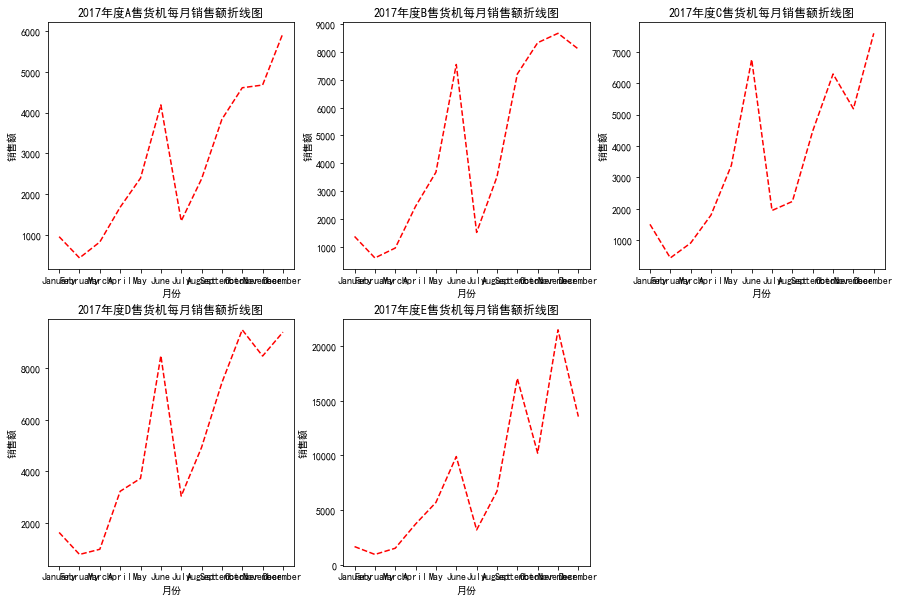

In [118]:
p1 = plt.figure(figsize=(15,10))## 设置画布
## 子图1
ax1 = p1.add_subplot(2,3,1)
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
name = c11['paytime']## 提取其中的paytime数组，视为数据的标签
values = c11['sum']## 提取其中的sum数组，数据的存在位置
label =name
plt.plot(name,values,color = 'r',linestyle = '--')
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('销售额')## 添加y轴名称
plt.xticks(range(12), label)
plt.title('2017年度A售货机每月销售额折线图')## 添加图表标题
## 子图2
ax2 = p1.add_subplot(2,3,2)
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
name = c22['paytime']## 提取其中的paytime数组，视为数据的标签
values = c22['sum']## 提取其中的sum数组，数据的存在位置
label =name
plt.plot(name,values,color = 'r',linestyle = '--')
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('销售额')## 添加y轴名称
plt.xticks(range(12), label)
plt.title('2017年度B售货机每月销售额折线图')## 添加图表标题
## 子图3
ax3 = p1.add_subplot(2,3,3)
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
name = c33['paytime']## 提取其中的paytime数组，视为数据的标签
values = c33['sum']## 提取其中的sum数组，数据的存在位置
label =name
plt.plot(name,values,color = 'r',linestyle = '--')
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('销售额')## 添加y轴名称
plt.xticks(range(12), label)
plt.title('2017年度C售货机每月销售额折线图')## 添加图表标题
## 子图4
ax4 = p1.add_subplot(2,3,4)
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
name = c44['paytime']## 提取其中的paytime数组，视为数据的标签
values = c44['sum']## 提取其中的sum数组，数据的存在位置
label =name
plt.plot(name,values,color = 'r',linestyle = '--')
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('销售额')## 添加y轴名称
plt.xticks(range(12), label)
plt.title('2017年度D售货机每月销售额折线图')## 添加图表标题
## 子图5
ax5 = p1.add_subplot(2,3,5)
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
name = c55['paytime']## 提取其中的paytime数组，视为数据的标签
values = c55['sum']## 提取其中的sum数组，数据的存在位置
label =name
plt.plot(name,values,color = 'r',linestyle = '--')
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('销售额')## 添加y轴名称
plt.xticks(range(12), label)
plt.title('2017年度E售货机每月销售额折线图')## 添加图表标题
plt.savefig('C:/Users/84011/Desktop/2017年度每月销售额折线图.png')
plt.show()

In [112]:
idear = pd.read_csv(r"C:\Users\84011\Desktop\fujian11.csv",encoding = 'gbk')

In [113]:
jiqi11=idear.loc[idear['设备ID']=='E43A6E078A07631', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现','大类']]
jiqi22=idear.loc[idear['设备ID']=='E43A6E078A04134', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现','大类']]
jiqi33=idear.loc[idear['设备ID']=='E43A6E078A04172', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现','大类']]
jiqi44=idear.loc[idear['设备ID']=='E43A6E078A04228', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现','大类']]
jiqi55=idear.loc[idear['设备ID']=='E43A6E078A06874', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现','大类']]

In [122]:
s1=0
s2=0
for i in jiqi11['大类']:
    if i=='饮料':
        m1=jiqi11.loc[jiqi11['大类']=='饮料',['实际金额']]
        s1=m1.sum()*0.25
    elif i=='非饮料':
        m2=jiqi11.loc[jiqi11['大类']=='非饮料',['实际金额']]
        s2=m2.sum()*0.2
s=[s1,s2]#分别求出饮料类和非饮料类的商品毛利润之和，下面操作类似

In [123]:
n1=0
n2=0
for i in jiqi22['大类']:
    if i=='饮料':
        m3=jiqi22.loc[jiqi22['大类']=='饮料',['实际金额']]
        n1=m3.sum()*0.25
    elif i=='非饮料':
        m4=jiqi22.loc[jiqi22['大类']=='非饮料',['实际金额']]
        n2=m4.sum()*0.2
N1=[n1,n2]

In [124]:
n3=0
n4=0
for i in jiqi33['大类']:
    if i=='饮料':
        m5=jiqi33.loc[jiqi33['大类']=='饮料',['实际金额']]
        n3=m5.sum()*0.25
    elif i=='非饮料':
        m6=jiqi33.loc[jiqi33['大类']=='非饮料',['实际金额']]
        n4=m6.sum()*0.2
N2=[n3,n4]

In [125]:
n5=0
n6=0
for i in jiqi44['大类']:
    if i=='饮料':
        m7=jiqi44.loc[jiqi44['大类']=='饮料',['实际金额']]
        n5=m7.sum()*0.25
    elif i=='非饮料':
        m8=jiqi44.loc[jiqi44['大类']=='非饮料',['实际金额']]
        n6=m8.sum()*0.2
N3=[n5,n6]

In [126]:
n7=0
n8=0
for i in jiqi55['大类']:
    if i=='饮料':
        m9=jiqi55.loc[jiqi55['大类']=='饮料',['实际金额']]
        n7=m9.sum()*0.25
    elif i=='非饮料':
        m10=jiqi55.loc[jiqi55['大类']=='非饮料',['实际金额']]
        n8=m10.sum()*0.2
N4=[n7,n8]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:30

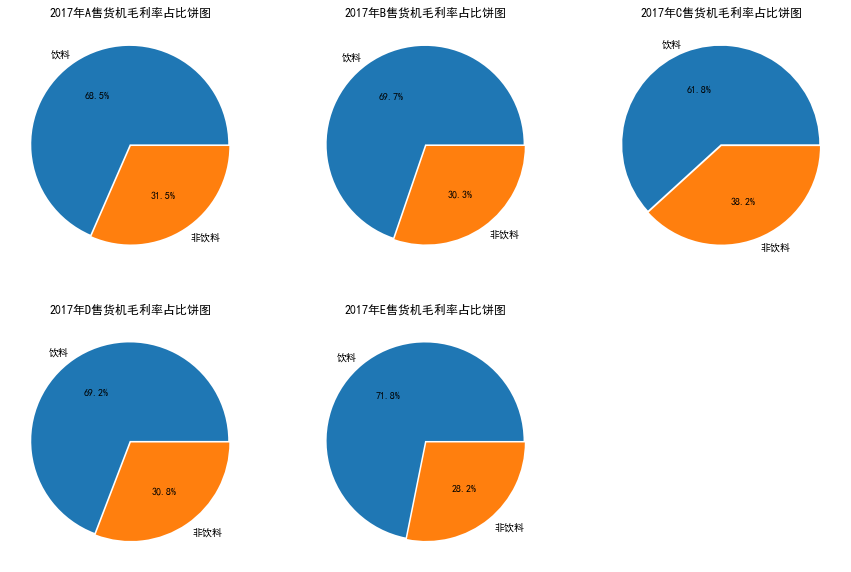

In [127]:
p1 = plt.figure(figsize=(15,10))## 将画布设定为正方形，则绘制的饼图是正圆
## 子图1
ax1 = p1.add_subplot(2,3,1)
label= ['饮料','非饮料']## 定义饼状图的标签，标签是列表
explode = [0.01, 0.01]## 设定各项离心n个半径
plt.pie(s, explode=explode, labels=label, autopct='%1.1f%%')## 绘制饼图
plt.title('2017年A售货机毛利率占比饼图')
## 子图2
ax2 = p1.add_subplot(2,3,2)
label= ['饮料','非饮料']## 定义饼状图的标签，标签是列表
explode = [0.01, 0.01]## 设定各项离心n个半径
plt.pie(N1, explode=explode, labels=label, autopct='%1.1f%%')## 绘制饼图
plt.title('2017年B售货机毛利率占比饼图')
## 子图3
ax3 = p1.add_subplot(2,3,3)
label= ['饮料','非饮料']## 定义饼状图的标签，标签是列表
explode = [0.01, 0.01]## 设定各项离心n个半径
plt.pie(N2, explode=explode, labels=label, autopct='%1.1f%%')## 绘制饼图
plt.title('2017年C售货机毛利率占比饼图')
## 子图4
ax4 = p1.add_subplot(2,3,4)
label= ['饮料','非饮料']## 定义饼状图的标签，标签是列表
explode = [0.01, 0.01]## 设定各项离心n个半径
plt.pie(N3, explode=explode, labels=label, autopct='%1.1f%%')## 绘制饼图
plt.title('2017年D售货机毛利率占比饼图')
## 子图5
ax5 = p1.add_subplot(2,3,5)
label= ['饮料','非饮料']## 定义饼状图的标签，标签是列表
explode = [0.01, 0.01]## 设定各项离心n个半径
plt.pie(N4, explode=explode, labels=label, autopct='%1.1f%%')## 绘制饼图
plt.title('2017年E售货机毛利率占比饼图')
plt.savefig('C:/Users/84011/Desktop/2017年各台售货机毛利率占比饼图')
plt.show()

In [134]:
c11['百分比']=pd.Series(map(lambda x:((c11['sum'][x]-c11['sum'][x-1])/c11['sum'][x-1]),range(1,len(c11['sum']))))
c22['百分比']=pd.Series(map(lambda x:((c22['sum'][x]-c22['sum'][x-1])/c22['sum'][x-1]),range(1,len(c22['sum']))))
c33['百分比']=pd.Series(map(lambda x:((c33['sum'][x]-c33['sum'][x-1])/c33['sum'][x-1]),range(1,len(c33['sum']))))
c44['百分比']=pd.Series(map(lambda x:((c44['sum'][x]-c44['sum'][x-1])/c44['sum'][x-1]),range(1,len(c44['sum']))))
c55['百分比']=pd.Series(map(lambda x:((c55['sum'][x]-c55['sum'][x-1])/c55['sum'][x-1]),range(1,len(c55['sum']))))#环比增长率计算方法

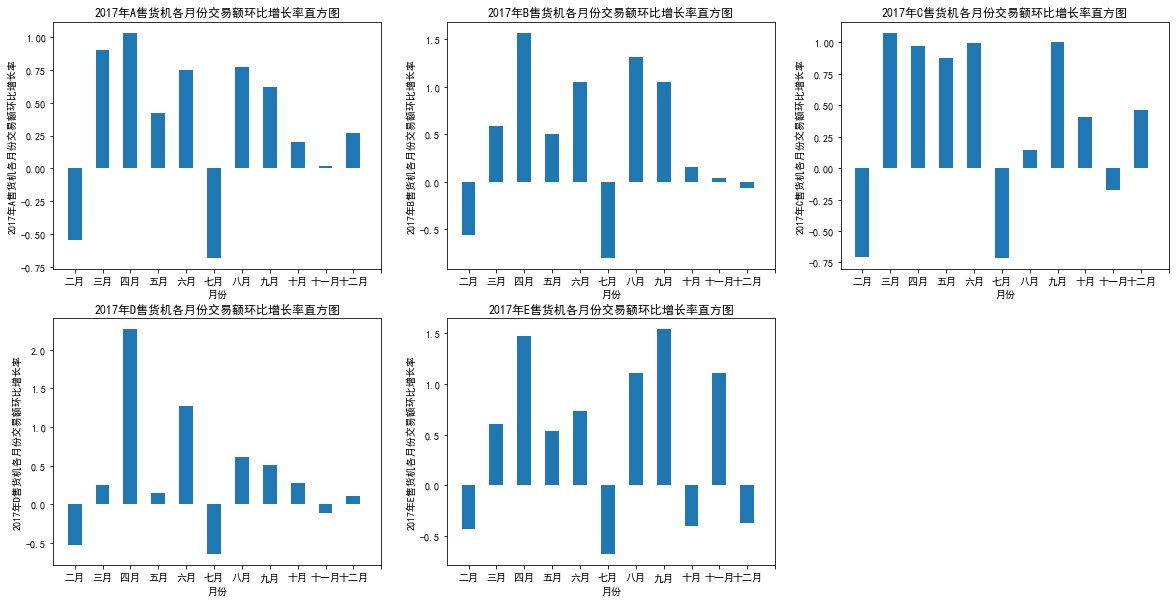

In [137]:
p1 = plt.figure(figsize=(20,10))
## 子图1
ax1 = p1.add_subplot(2,3,1)
name = ['二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 提取其中的商品数组，视为数据的标签
values =c11['百分比']## 提取其中的数量数组，数据的存在位置
label = ['二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 刻度标签
my_height = values
plt.bar(range(12), my_height, width = 0.5)## 绘制散点图
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('2017年A售货机各月份交易额环比增长率')## 添加y轴名称
plt.xticks(range(12), label)
plt.title('2017年A售货机各月份交易额环比增长率直方图')## 添加图表标题
## 子图2
ax2 = p1.add_subplot(2,3,2)
name = ['二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 提取其中的商品数组，视为数据的标签
values =c22['百分比']## 提取其中的数量数组，数据的存在位置
label = ['二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 刻度标签
my_height = values
plt.bar(range(12), my_height, width = 0.5)## 绘制散点图
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('2017年B售货机各月份交易额环比增长率')## 添加y轴名称
plt.xticks(range(12), label)
plt.title('2017年B售货机各月份交易额环比增长率直方图')## 添加图表标题
## 子图3
ax3 = p1.add_subplot(2,3,3)
name = ['二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 提取其中的商品数组，视为数据的标签
values =c33['百分比']## 提取其中的数量数组，数据的存在位置
label = ['二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 刻度标签
my_height = values
plt.bar(range(12), my_height, width = 0.5)## 绘制散点图
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('2017年C售货机各月份交易额环比增长率')## 添加y轴名称
plt.xticks(range(12), label)
plt.title('2017年C售货机各月份交易额环比增长率直方图')## 添加图表标题
## 子图4
ax4 = p1.add_subplot(2,3,4)
name = ['二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 提取其中的商品数组，视为数据的标签
values =c44['百分比']## 提取其中的数量数组，数据的存在位置
label = ['二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 刻度标签
my_height = values
plt.bar(range(12), my_height, width = 0.5)## 绘制散点图
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('2017年D售货机各月份交易额环比增长率')## 添加y轴名称
plt.xticks(range(12), label)
plt.title('2017年D售货机各月份交易额环比增长率直方图')## 添加图表标题
## 子图5
ax5 = p1.add_subplot(2,3,5)
name = ['二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 提取其中的商品数组，视为数据的标签
values =c55['百分比']## 提取其中的数量数组，数据的存在位置
label = ['二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 刻度标签
my_height = values
plt.bar(range(12), my_height, width = 0.5)## 绘制散点图
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('2017年E售货机各月份交易额环比增长率')## 添加y轴名称
plt.xticks(range(12), label)
plt.title('2017年E售货机各月份交易额环比增长率直方图')## 添加图表标题
plt.savefig('C:/Users/84011/Desktop/各月份交易额环比增长率直方图.png')
plt.show()

In [139]:
c1x=jiqi1Group[['实际金额']].agg([np.mean])
c1x.to_csv('C:/Users/84011/Desktop/c1x.csv')
c2x=jiqi2Group[['实际金额']].agg([np.mean])
c2x.to_csv('C:/Users/84011/Desktop/c2x.csv')
c3x=jiqi3Group[['实际金额']].agg([np.mean])
c3x.to_csv('C:/Users/84011/Desktop/c3x.csv')
c4x=jiqi4Group[['实际金额']].agg([np.mean])
c4x.to_csv('C:/Users/84011/Desktop/c4x.csv')
c5x=jiqi5Group[['实际金额']].agg([np.mean])
c5x.to_csv('C:/Users/84011/Desktop/c5x.csv')#使用agg函数对分组聚合的数据进行处理，计算售货机平均交易额，下面操作类似

In [140]:
c1x1= pd.read_csv(r"C:\Users\84011\Desktop\c1x1.csv",encoding = 'gbk')
c2x2= pd.read_csv(r"C:\Users\84011\Desktop\c2x2.csv",encoding = 'gbk')
c3x3= pd.read_csv(r"C:\Users\84011\Desktop\c3x3.csv",encoding = 'gbk')
c4x4= pd.read_csv(r"C:\Users\84011\Desktop\c4x4.csv",encoding = 'gbk')
c5x5= pd.read_csv(r"C:\Users\84011\Desktop\c5x5.csv",encoding = 'gbk')#读取文件

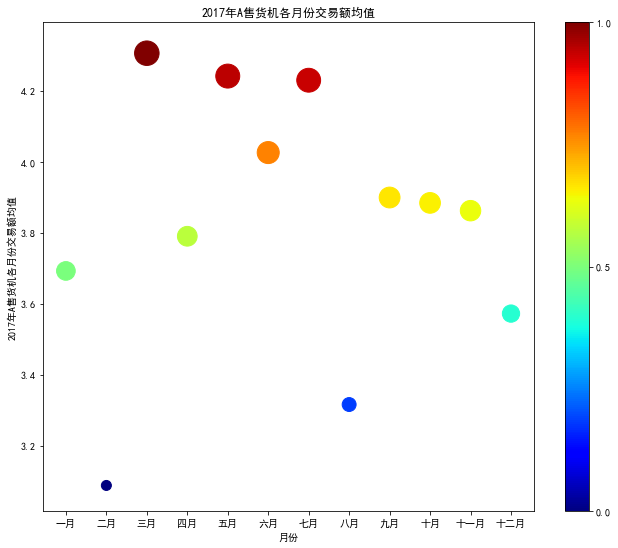

In [169]:
x = c1x1['paytime']#添加横轴，下面操作类似
y = c1x1['mean']#添加纵轴，下面操作类似
area = c1x1['mean']#添加气泡大小判断，下面操作类似
colors = c1x1['mean']#添加气泡颜色程度判断，下面操作类似
labe2 =   ['一月','二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 刻度标签
mincol = min(colors)
maxcol = max(colors)
std = (area-float(min(area)))/(max(area)-min(area))
stdArea = 100+ 500*std#气泡大小设置，下面操作类似
stdColor = (colors-float(min(colors)))/(max(colors)-min(colors))#气泡颜色设置，下面操作类似
figsize = 11,9
fig, ax = plt.subplots(figsize=figsize)
cax = ax.scatter(x,y,s=stdArea,c=stdColor,cmap='jet',alpha=1)
cbar = fig.colorbar(cax, ticks=[0,0.5,1])
plt.xlabel('月份')## 添加横轴标签，下面操作类似
plt.ylabel('2017年A售货机各月份交易额均值')## 添加y轴名称，下面操作类似
plt.xticks(range(12), labe2)## 添加x轴刻度，下面操作类似
plt.title('2017年A售货机各月份交易额均值')## 添加图表标题，下面操作类似
plt.savefig('C:/Users/84011/Desktop/2017年A售货机各月份交易额均值图.png')
plt.show()

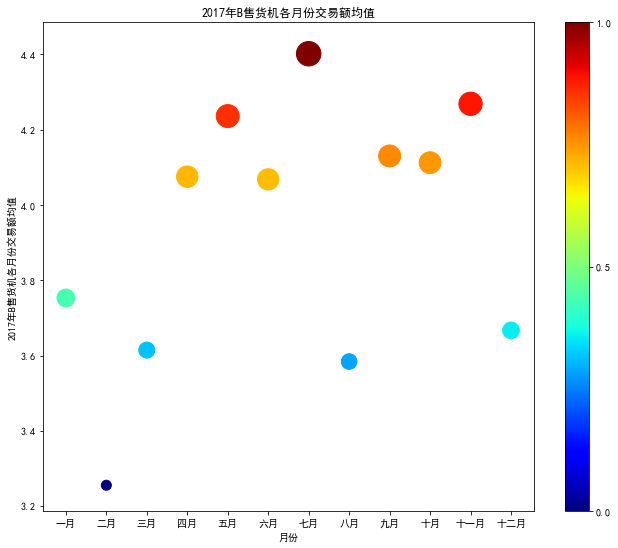

In [170]:
x = c2x2['paytime']
y = c2x2['mean']
area = c2x2['mean']
colors = c2x2['mean']
labe2 =   ['一月','二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 刻度标签
mincol = min(colors)
maxcol = max(colors)
std = (area-float(min(area)))/(max(area)-min(area))
stdArea = 100+ 500*std
stdColor = (colors-float(min(colors)))/(max(colors)-min(colors))
figsize = 11,9
fig, ax = plt.subplots(figsize=figsize)
cax = ax.scatter(x,y,s=stdArea,c=stdColor,cmap='jet',alpha=1)
cbar = fig.colorbar(cax, ticks=[0,0.5,1])
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('2017年B售货机各月份交易额均值')## 添加y轴名称
plt.xticks(range(12), labe2)
plt.title('2017年B售货机各月份交易额均值')## 添加图表标题
plt.savefig('C:/Users/84011/Desktop/2017年B售货机各月份交易额均值图.png')
plt.show()

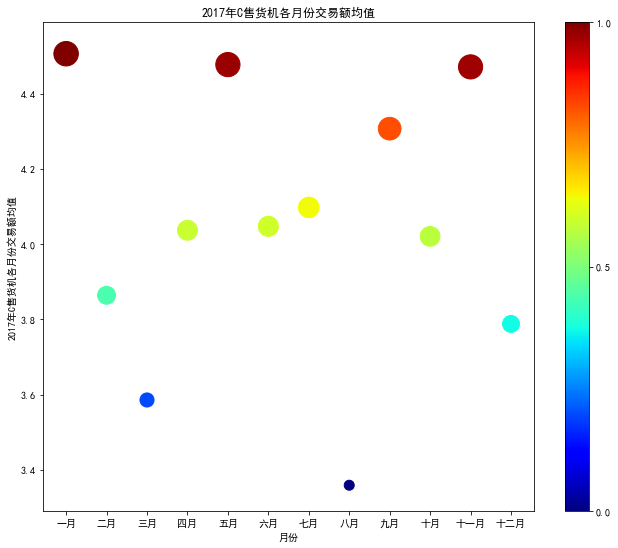

In [171]:
x = c3x3['paytime']
y = c3x3['mean']
area = c3x3['mean']
colors = c3x3['mean']
labe2 =   ['一月','二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 刻度标签
mincol = min(colors)
maxcol = max(colors)
std = (area-float(min(area)))/(max(area)-min(area))
stdArea = 100+ 500*std
stdColor = (colors-float(min(colors)))/(max(colors)-min(colors))
figsize = 11,9
fig, ax = plt.subplots(figsize=figsize)
cax = ax.scatter(x,y,s=stdArea,c=stdColor,cmap='jet',alpha=1)
cbar = fig.colorbar(cax, ticks=[0,0.5,1])
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('2017年C售货机各月份交易额均值')## 添加y轴名称
plt.xticks(range(12), labe2)
plt.title('2017年C售货机各月份交易额均值')## 添加图表标题
plt.savefig('C:/Users/84011/Desktop/2017年C售货机各月份交易额均值图.png')
plt.show()

In [172]:
x = c4x4['paytime']
y = c4x4['mean']
area = c4x4['mean']
colors = c4x4['mean']
labe2 =   ['一月','二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 刻度标签
mincol = min(colors)
maxcol = max(colors)
std = (area-float(min(area)))/(max(area)-min(area))
stdArea = 100+ 500*std
stdColor = (colors-float(min(colors)))/(max(colors)-min(colors))
figsize = 11,9
fig, ax = plt.subplots(figsize=figsize)
cax = ax.scatter(x,y,s=stdArea,c=stdColor,cmap='jet',alpha=1)
cbar = fig.colorbar(cax, ticks=[0,0.5,1])
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('2017年D售货机各月份交易额均值')## 添加y轴名称
plt.xticks(range(12), labe2)
plt.title('2017年D售货机各月份交易额均值')## 添加图表标题
plt.savefig('C:/Users/84011/Desktop/2017年D售货机各月份交易额均值图.png')
plt.show()

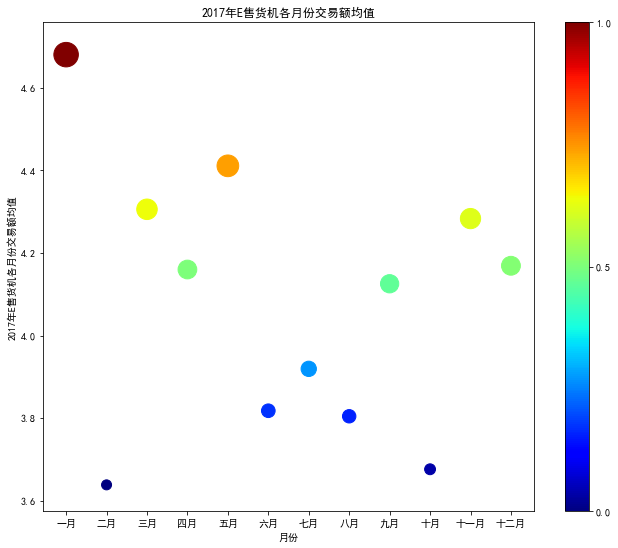

In [173]:
x = c5x5['paytime']
y = c5x5['mean']
area = c5x5['mean']
colors = c5x5['mean']
labe2 =   ['一月','二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']## 刻度标签
mincol = min(colors)
maxcol = max(colors)
std = (area-float(min(area)))/(max(area)-min(area))
stdArea = 100+ 500*std
stdColor = (colors-float(min(colors)))/(max(colors)-min(colors))
figsize = 11,9
fig, ax = plt.subplots(figsize=figsize)
cax = ax.scatter(x,y,s=stdArea,c=stdColor,cmap='jet',alpha=1)
cbar = fig.colorbar(cax, ticks=[0,0.5,1])
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('2017年E售货机各月份交易额均值')## 添加y轴名称
plt.xticks(range(12), labe2)
plt.title('2017年E售货机各月份交易额均值')## 添加图表标题
plt.savefig('C:/Users/84011/Desktop/2017年E售货机各月份交易额均值图.png')
plt.show()

In [181]:
order2 = pd.read_csv(r"C:\Users\84011\Desktop\fujian.csv",encoding = 'gbk')##读取附件

In [184]:
order2=order2[ ~ order2['支付时间'].str.contains('PM')]

In [186]:
order2['支付时间'] = pd.to_datetime(order2['支付时间'])
periodIndex = pd.PeriodIndex(order2['支付时间'],freq = 'H')
order2['paytime']=periodIndex

In [187]:
jiqi3x=order2.loc[order['设备ID']=='E43A6E078A04172', ['订单号','设备ID', '应付金额','实际金额','商品','支付时间','地点','状态','提现','paytime']]

In [188]:
jiqi3Groupx=jiqi3x.groupby(by='paytime')

In [189]:
e3=jiqi3Groupx[['实际金额']].agg([np.size])
e3.to_csv('C:/Users/84011/Desktop/e3.csv')

In [28]:
e2 = pd.read_csv(r"C:\Users\84011\Desktop\e2.csv", low_memory = False)#防止弹出警告
e22 = pd.DataFrame(e2)#转换e2格式


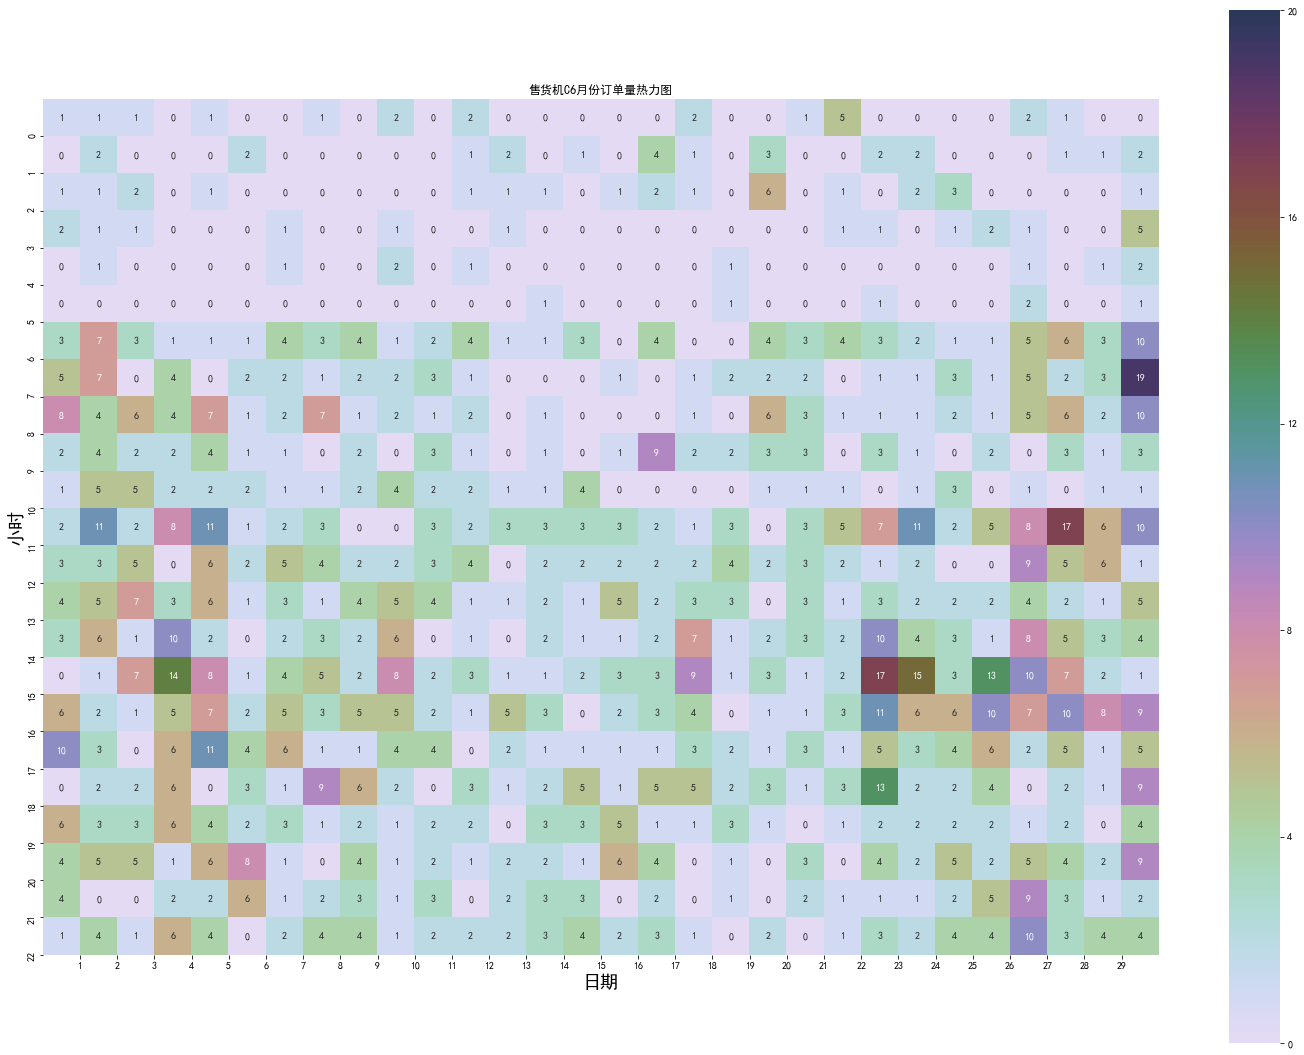

In [33]:
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize = (25,19))
h=e22
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)#设置cmap参数，下面操作类似
sns.heatmap(h,annot=True, vmax=20,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap=cmap)
ax.set_ylabel('小时', fontsize = 18)#添加横轴标签，下面操作类似
ax.set_xlabel('日期', fontsize = 18) #添加纵轴标签，下面操作类似
ax.set_title('售货机C6月份订单量热力图')##添加标题，下面操作类似
m=range(1,24,1)##设置刻度，间距，下面操作类似
n=range(1,30,1)
plt.xticks(n, ('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30'))
plt.yticks(m, ('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'))
plt.savefig('C:/Users/84011/Desktop/售货机C6月份订单量热力图.png')
plt.show()


In [29]:
e4 = pd.read_csv(r"C:\Users\84011\Desktop\e4.csv", low_memory = False)#防止弹出警告
e44 = pd.DataFrame(e4)
e5 = pd.read_csv(r"C:\Users\84011\Desktop\e5.csv", low_memory = False)#防止弹出警告
e55 = pd.DataFrame(e5)



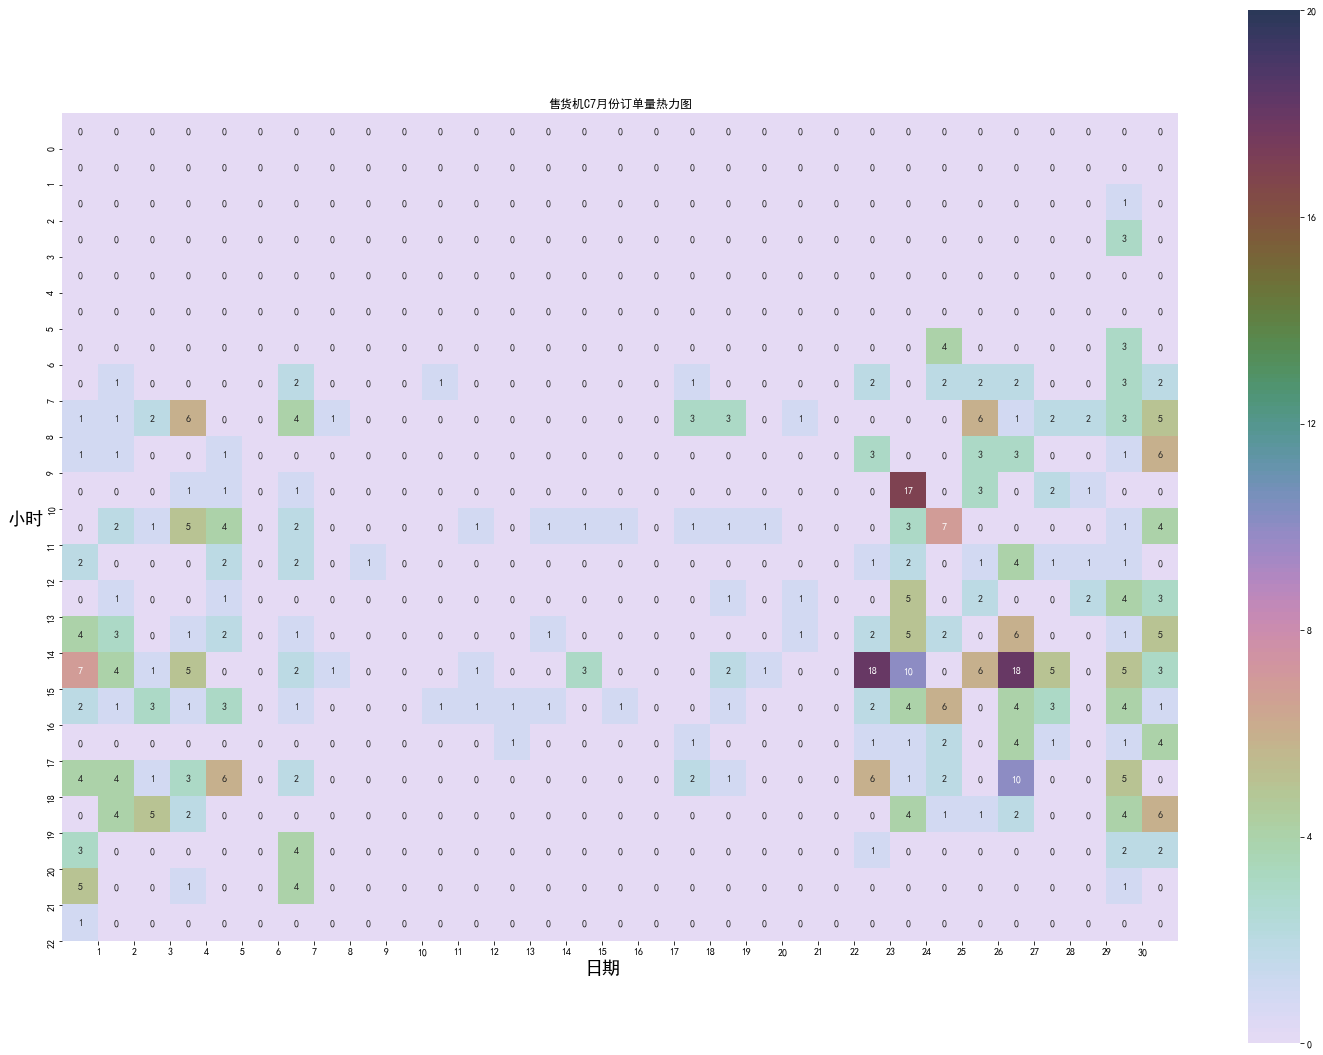

In [34]:
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize = (25,19))
h1=e44
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(h1,annot=True, vmax=20,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap=cmap)
ax.set_ylabel('小时', fontsize = 18,rotation = 360,horizontalalignment='right')
ax.set_xlabel('日期', fontsize = 18,horizontalalignment='right') 
ax.set_title('售货机C7月份订单量热力图')
m=range(1,24,1)
n=range(1,31,1)
plt.xticks(n, ('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31'))
plt.yticks(m, ('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'))
plt.savefig('C:/Users/84011/Desktop/售货机C7月份订单量热力图.png')
plt.show()


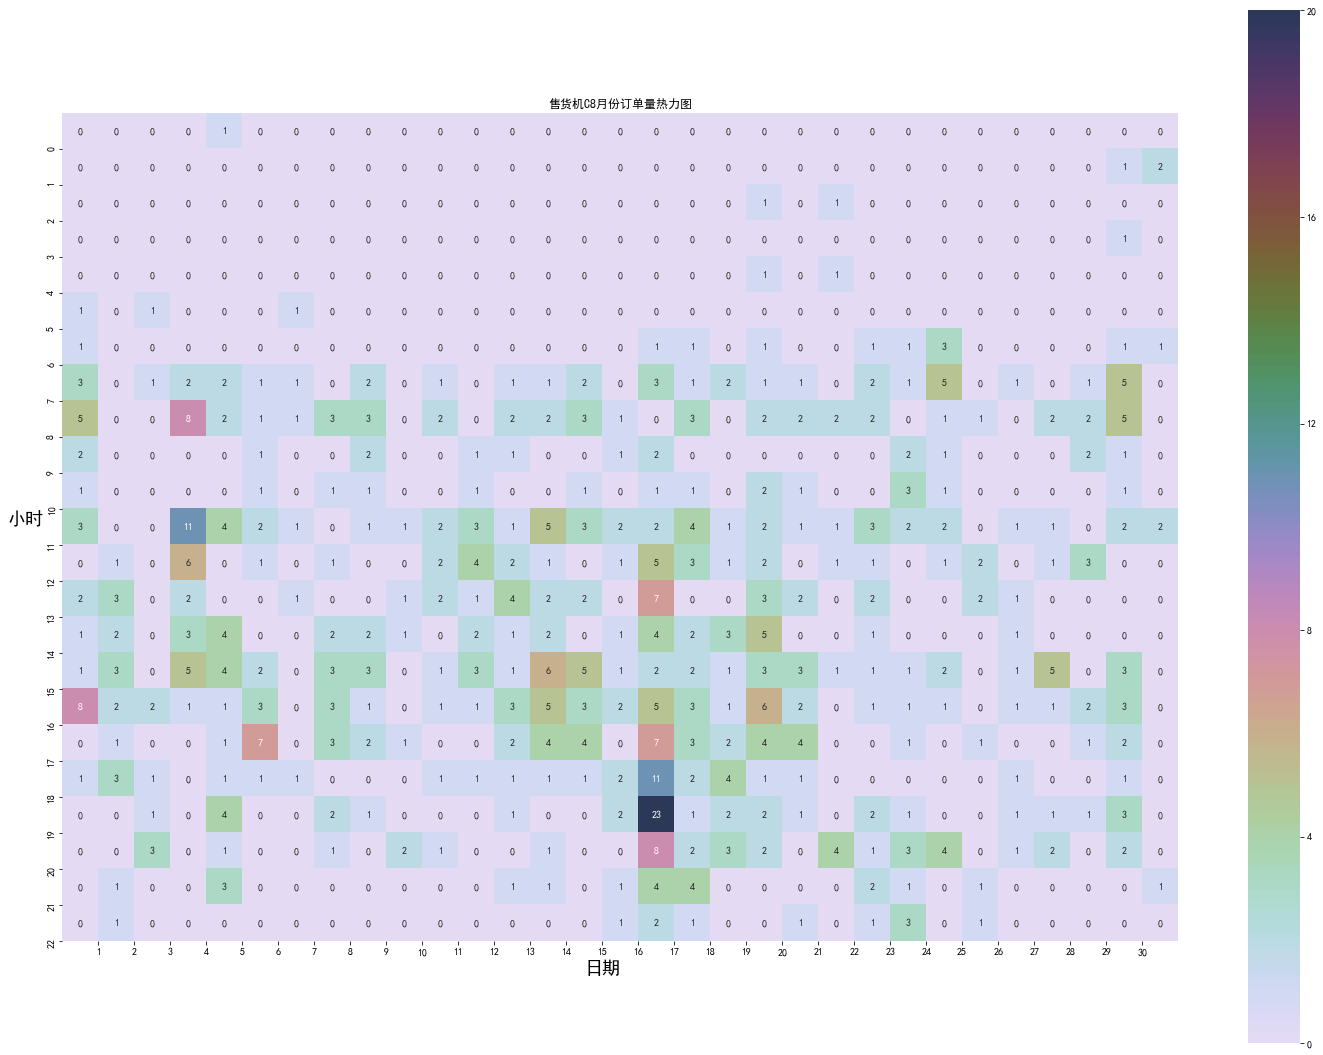

In [35]:
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize = (25,19))
h2=e55
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(h2,annot=True, vmax=20,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap=cmap)
ax.set_ylabel('小时', fontsize = 18,rotation = 360,horizontalalignment='right')
ax.set_xlabel('日期', fontsize = 18,horizontalalignment='right') 
ax.set_title('售货机C8月份订单量热力图')
m=range(1,24,1)
n=range(1,31,1)
plt.xticks(n, ('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31'))
plt.yticks(m, ('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'))
plt.savefig('C:/Users/84011/Desktop/售货机C8月份订单量热力图.png')
plt.show()